In [42]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import seaborn as sns
from train_test_divide import extract_normal, extract_spammers_scrapers
import os


In [36]:
path = os.path.dirname(os.path.abspath("__file__"))
dir = path.replace('notebooks', 'csv_files')
os.chdir(dir)

df_anomaly_train = pd.read_csv('train.csv')
df_anomaly_test = pd.read_csv('test.csv')

anomaly_inputs = ['request_freq', 'avg_tokens', 'longest_consec', 'var_score', 'sequence_time']
#anomaly_inputs = ['avg_tokens', 'var_score', 'longest_consec']

model_if = IsolationForest(contamination=0.002, random_state=42)
model_if.fit(df_anomaly_train[anomaly_inputs])

c:\Users\vhage\Documents\Skolarbete\Exjobb\request-analyzer-model\venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.002, random_state=42)

In [39]:
#Code for checking how many spammers and scarpers that are present in test dataset
df_test = pd.read_csv('test.csv')
df_test_spam = extract_spammers_scrapers(df_test)
df_test_spam

,request_freq,avg_tokens,longest_consec,var_score,sequence_time,user
0,2.036531,2.0,12.0,0.002772,99.790,user-1003
1,2.572653,4.0,6.0,0.002230,126.060,user-1003
2,2.268571,2.0,13.0,0.002353,111.160,user-1003
3,2.132122,2.0,6.0,0.002353,104.474,user-1003
4,2.198367,3.0,10.0,0.002420,107.720,user-1003
...,...,...,...,...,...,...
2672,2.339792,2.0,6.0,0.002321,112.310,user-1004
2673,1.872667,3.0,9.0,0.002728,89.888,user-1004
2674,1.997229,2.0,8.0,0.002523,95.867,user-1004
2675,1.951667,2.0,6.0,0.002419,93.680,user-1004


In [26]:
#Code for checking how many normal users that are present in test dataset
df_test_normal = extract_normal(df_test, df_test_spam)
df_test_normal

,request_freq,avg_tokens,longest_consec,var_score,sequence_time,user
2677,1.846093,3.000000,4.0,0.000541,79.382,user-65
2678,35.481340,1.166667,3.0,0.000525,1667.623,user-565
2679,98.716500,0.466667,5.0,0.000573,3948.660,user-842
2680,604.458950,0.135802,4.0,0.000496,24178.358,user-38
2681,311.160590,0.142857,3.0,0.000489,12135.263,user-38
...,...,...,...,...,...,...
3286,562.245830,0.168539,5.0,0.000622,26425.554,user-186
3287,598.277932,0.147727,2.0,0.000686,26324.229,user-147
3288,387.771702,0.096774,8.0,0.000722,18225.270,user-754
3289,642.863652,0.111111,3.0,0.000646,29571.728,user-754


In [37]:
df_anomaly_test['anomaly_score'] = model_if.decision_function(df_anomaly_test[anomaly_inputs])
df_anomaly_test['anomaly'] = model_if.predict(df_anomaly_test[anomaly_inputs])

#This dataframe will only include anomaly score and anomaly label
df_anomaly_score = df_anomaly_test.loc[:,['anomaly_score', 'anomaly']]
df_anomaly_score['user'] = df_anomaly_test['user']
df_a = df_anomaly_score.loc[df_anomaly_score['anomaly']==-1] 
print(df_a)

"""
Test result:
Using all features:
    Sequence length: 15 with 8917 anomalies
        True positives = 2059
        False positives = 4
        True negatives = 1811
        False negatives = 6858

    Sequence length: 25 with 5351 anomalies
        True positives = 2011
        False positives = 11
        True negatives = 1128
        False negatives = 3340

    Sequence length: 35 with 3822 anomalies
        True positives = 2455
        False positives = 0
        True negatives = 835
        False negatives = 1367

    Sequence length: 45 with 2973 anomalies
        True positives = 1972
        False positives = 0
        True negatives = 672
        False negatives = 1001 

    Sequence length: 55 with 2433 anomalies
        True positives = 2246
        False positives = 0
        True negatives = 567
        False negatives = 187        

    Sequence length: 65 with 2060 anomalies
        True positives = 2060
        False positives =  0
        True negatives = 497
        False nagtives = 0   
"""



      anomaly_score  anomaly        user
0         -0.039049       -1   user-1003
1         -0.026238       -1   user-1003
2         -0.032952       -1   user-1003
4         -0.024268       -1   user-1003
6         -0.045194       -1   user-1003
...             ...      ...         ...
2669      -0.026106       -1   user-1004
2671      -0.035722       -1   user-1004
2673      -0.016665       -1   user-1004
2674      -0.012647       -1   user-1004
2676      -0.054140       -1   user-1004

[2247 rows x 3 columns]


'\nTest result:\nUsing all features:\n    Sequence length: 15 with 8917 anomalies\n        True positives = 2059\n        False positives = 4\n        True negatives = 1811\n        False negatives = 6858\n\n    Sequence length: 25 with 5351 anomalies\n        True positives = 2011\n        False positives = 11\n        True negatives = 1128\n        False negatives = 3340\n\n    Sequence length: 35 with 3822 anomalies\n        True positives = 2455\n        False positives = 0\n        True negatives = 835\n        False negatives = 1367\n\n    Sequence length: 45 with 2973 anomalies\n        True positives = 1972\n        False positives = 0\n        True negatives = 672\n        False negatives = 1001 \n\n    Sequence length: 55 with 2433 anomalies\n        True positives = 2246\n        False positives = 0\n        True negatives = 567\n        False negatives = 187        \n\n    Sequence length: 65 with 2060 anomalies\n        True positives = 2060\n        False positives =  0\n

In [40]:
#To check which users thar are flagged as anomalies
print(set(df_a['user'].to_list()))
#print(df_anomaly_test.loc[df_anomaly_test['user']== ' user-693'])

{' user-1003', ' user-1005', ' user-1004'}


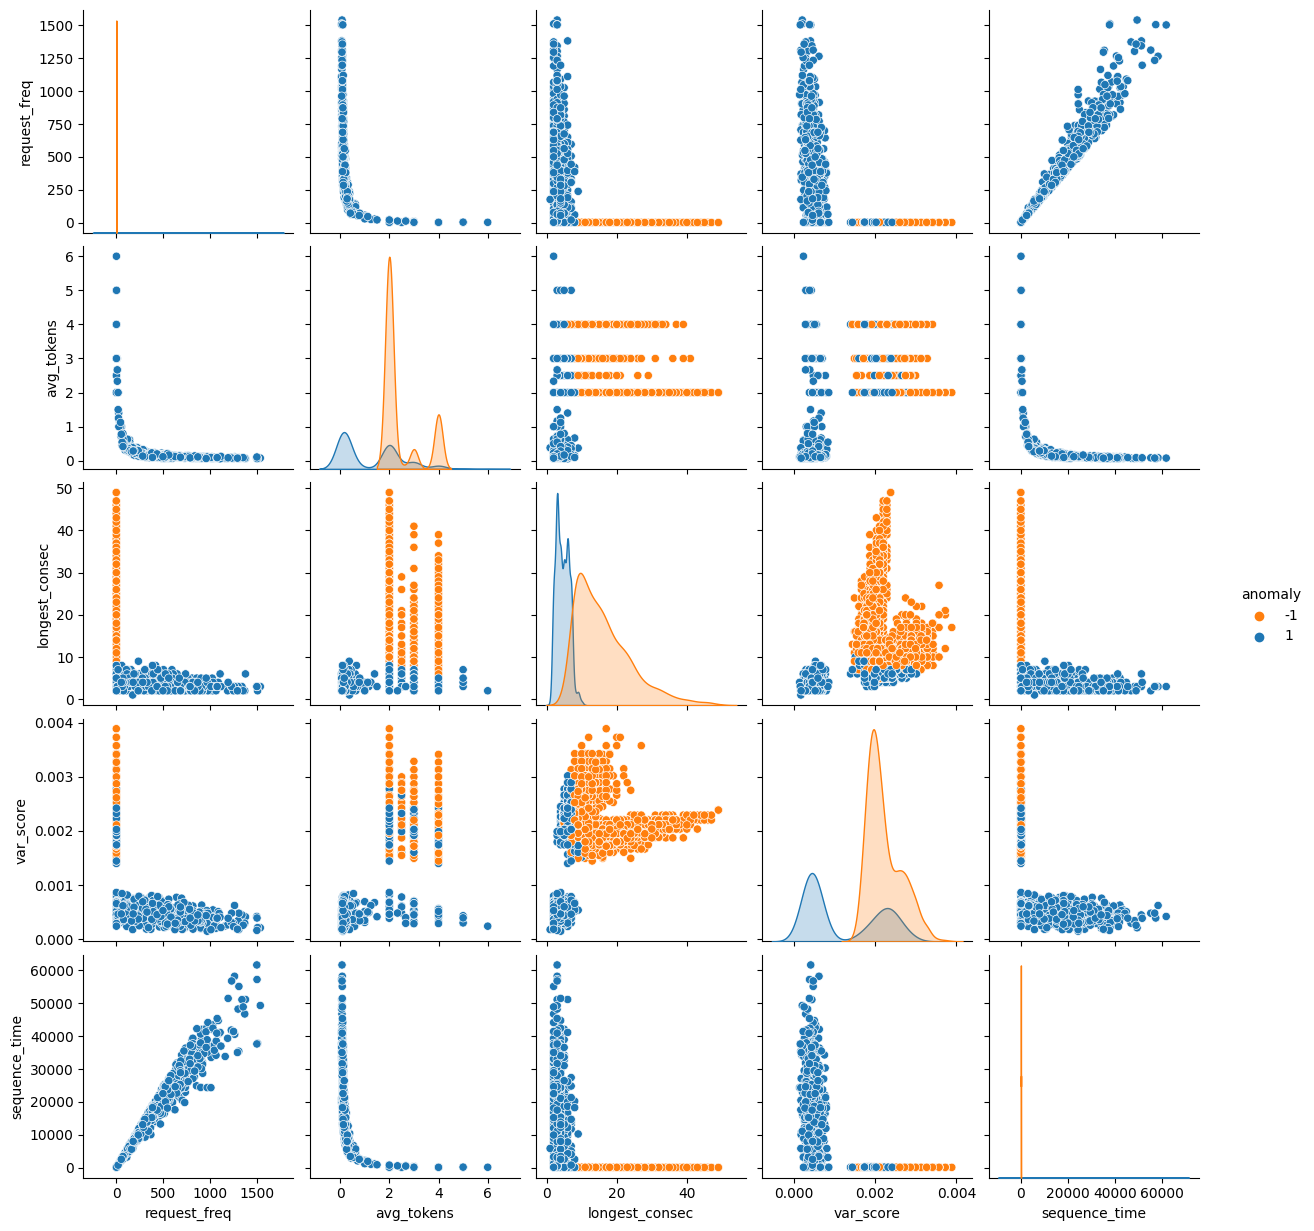

In [41]:
#Plots showcasing the outliers detected by isolation forest
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df_anomaly_test, vars=anomaly_inputs, hue='anomaly', palette=palette)